In [2]:
import pandas, numpy, seaborn, umap
import sklearn, sklearn.manifold, sklearn.preprocessing

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(8, 4)})
from  sklearn.decomposition import  PCA


# 0. user-defined data

In [9]:
# files should not have spaces
optimal_data_set_file = '/Users/farhadzare/Desktop/Endothelium/optimal_dataset.csv' 
optimal_data_set_names_file = '/Users/farhadzare/Desktop/Endothelium/optimal_dataset_list.csv'
metadata_folder = '/Users/farhadzare/Desktop/Endothelium/metadata/'

# 1. read data & metadata

## 1.1 read data

In [6]:
# restrict df to generic temporal variables. Use variable names that reflect their contents
expression = pandas.read_csv(optimal_data_set_file)
expression.drop(["Unnamed: 0"], axis='columns', inplace=True)
expression = expression.set_index("Feature")
expression.rename_axis(None, inplace=True)

print(expression.shape)
expression.head()

(4998, 2636)


,GSM752709.cel,GSM752710.cel,GSM752711.cel,GSM752712.cel,GSM752713.cel,GSM752714.cel,GSM752715.cel,GSM752716.cel,GSM752717.cel,GSM752718.cel,...,GSM46386.CEL,GSM46387.CEL,GSM46388.CEL,GSM46389.CEL,GSM46390.CEL,GSM46391.CEL,GSM46392.CEL,GSM46393.CEL,GSM46394.CEL,GSM46395.CEL
100,6.082276,6.296477,5.678143,5.903716,6.561618,6.563634,6.315923,6.285618,6.213070,6.462815,...,6.277586,6.319818,6.377999,6.527582,6.489835,6.624150,8.837815,8.586964,6.352242,6.281925
1000,8.910453,9.094440,9.018398,8.981716,9.903595,9.752144,10.060706,10.016482,10.449370,10.395254,...,8.676218,8.441180,8.843971,8.998472,8.892125,8.860669,9.992499,10.019584,8.024033,7.984392
10000,3.903745,3.573659,3.750108,4.090731,3.960562,3.867853,3.701989,3.649789,3.906663,3.963748,...,6.441616,6.292823,6.226290,6.620311,6.222595,6.497028,7.098504,7.330978,6.436398,6.473776
10005,5.963907,6.097107,5.790247,5.761399,6.016096,6.124152,6.104648,5.986309,5.860771,6.024226,...,7.281914,7.315629,7.086792,7.135733,7.045656,6.585559,7.457399,8.094391,6.995187,7.402195
10006,7.752008,7.465366,7.941747,7.606796,7.469340,7.268851,7.641408,7.385734,7.565066,7.325005,...,6.486721,6.146278,5.913813,5.738923,6.470929,6.267256,6.340759,7.332293,5.348349,5.980073


In [7]:
transpose_expression = expression.transpose()
transpose_expression.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.082276,8.910453,3.903745,5.963907,7.752008,7.375102,5.187760,5.620045,10.513556,9.541779,...,9.972469,11.040979,7.934275,10.396367,7.174313,9.607231,4.541300,5.560324,5.421064,6.115885
GSM752710.cel,6.296477,9.094440,3.573659,6.097107,7.465366,7.314584,4.776528,5.593111,10.304974,9.013600,...,9.869174,11.418171,8.313562,10.662624,6.760496,9.543961,4.129266,5.308262,5.107210,5.385675
GSM752711.cel,5.678143,9.018398,3.750108,5.790247,7.941747,7.420180,5.657152,5.238865,10.533208,9.677985,...,9.908754,11.222550,7.915767,10.335600,7.501811,9.677517,4.073877,5.546625,5.445133,5.948111
GSM752712.cel,5.903716,8.981716,4.090731,5.761399,7.606796,7.501158,5.115412,5.331495,10.522132,9.546220,...,9.884071,11.050198,7.927955,10.168285,7.240025,9.559407,4.563461,5.734750,5.229923,5.777848
GSM752713.cel,6.561618,9.903595,3.960562,6.016096,7.469340,7.443952,5.041231,5.256271,10.415659,9.294982,...,9.883845,9.632507,8.109991,10.208548,6.728994,9.398856,3.990184,5.004711,5.538198,5.569191


# 1.2. read metadata

Samples will be colored according to organ of origin, as defined in metadata files.

In [11]:
# get working studies
df = pandas.read_csv(optimal_data_set_names_file)
working_studies_data_files = df.iloc[:, -1].to_list()
print(len(working_studies_data_files), working_studies_data_files[:5])

working_studies_metadata_files = [element.replace('data', 'metadata') for element in working_studies_data_files]
print(len(working_studies_metadata_files), working_studies_metadata_files[:5])


168 ['E-GEOD-30169 data.csv', 'E-GEOD-5883 data.csv', 'E-GEOD-3920 data.csv', 'E-GEOD-5556 data.csv', 'E-GEOD-69996 data.csv']
168 ['E-GEOD-30169 metadata.csv', 'E-GEOD-5883 metadata.csv', 'E-GEOD-3920 metadata.csv', 'E-GEOD-5556 metadata.csv', 'E-GEOD-69996 metadata.csv']


In [13]:

# read tissue of origin
tissues_of_origin = []
for element in working_studies_metadata_files:
    file = metadata_folder + element
    df = pandas.read_csv(file, encoding='latin1')
    
    # check that species is human
    species = list(set(df['Species'].to_list()))
    if species != ['Homo sapiens']:
        print('ERROR about species')
        
    # get tissue of origin for this study
    tissue_of_origin = df['Organ'].to_list()
    for element in tissue_of_origin:
        tissues_of_origin.append(element)
    
# checking number of metadata elements
print(len(tissues_of_origin))

2636


In [14]:
# bring to "Other" if tissue of origin in less common than n samples
threshold = 10 # a threshold of 10 provides 20 groups which is perfect for tab20
unfrequent_tissues = []
unique_tissues = list(set(tissues_of_origin))
for element in unique_tissues:
    if tissues_of_origin.count(element) < threshold:
        unfrequent_tissues.append(element)

for i in range(len(tissues_of_origin)):
    if tissues_of_origin[i] in unfrequent_tissues:
        tissues_of_origin[i] = 'Other'
        
# checking frequencies
unique_tissues = list(set(tissues_of_origin))
for i in range(len(unique_tissues)):
    print(i, unique_tissues[i], tissues_of_origin.count(unique_tissues[i]))

0 Eye 50
1 Lymphatic system 27
2 Blood 140
3 Umbilical cord blood 41
4 Liver 84
5 Bone 43
6 Heart 164
7 Blood vessel 12
8 Other 34
9 Brain 34
10 Somatic cell hybrid 12
11 Placenta 19
12 Umbilical cord 887
13 Aorta 723
14 Kidney 14
15 Skin 113
16 Intestine 48
17 Uterus 10
18 Peripheral blood 24
19 Lung 157


In [15]:
# compute colors
tissue_ranks = [unique_tissues.index(element) for element in tissues_of_origin]

# checking
print('checking...')
for i in range(len(list(set(tissue_ranks)))):
    print(i, tissue_ranks.count(i))

# mapping
my_map = matplotlib.cm.get_cmap('tab20')
working_colors = my_map(tissue_ranks)

checking...
0 50
1 27
2 140
3 41
4 84
5 43
6 164
7 12
8 34
9 34
10 12
11 19
12 887
13 723
14 14
15 113
16 48
17 10
18 24
19 157


# 2. quantile normalization

   # 2.1. visualize raw data

In [16]:
# check the max and min of some rows and columns
# random gene
print(numpy.min(expression.loc[100]), numpy.max(expression.loc[100]))
# first sample
print(numpy.min(expression.iloc[:, 0]), numpy.max(expression.iloc[:, 0]))

-0.273055864480856 14.9369277370231
2.92495441874382 13.4211736028108


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


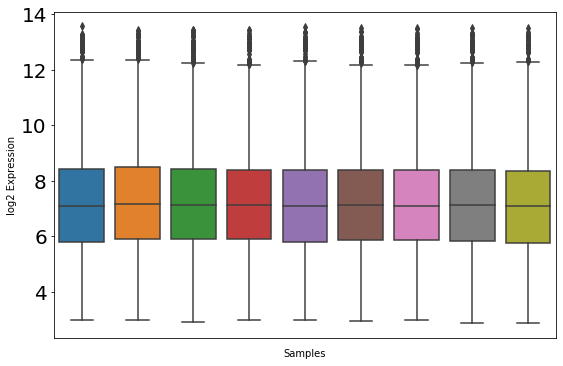

In [17]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:10], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

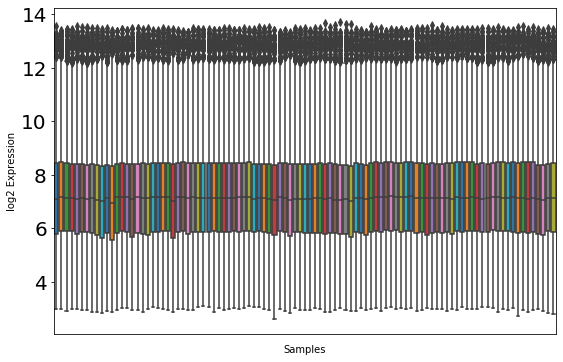

In [18]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:100], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

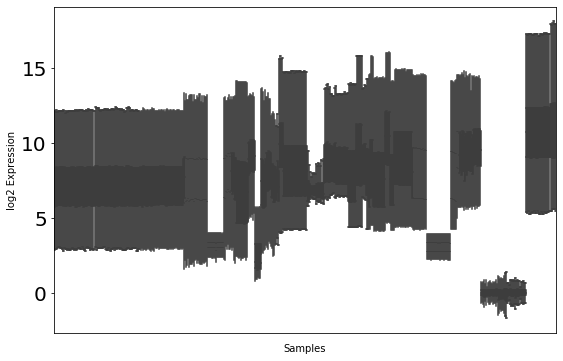

In [19]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 500:1000], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

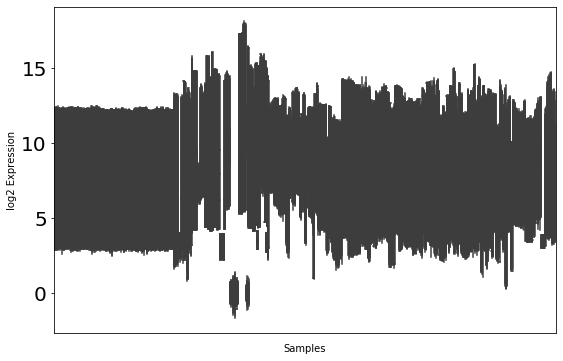

CPU times: user 2min 20s, sys: 812 ms, total: 2min 21s
Wall time: 2min 22s


In [20]:
%%time
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:expression.shape[1]], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

# 2.2. quantile normalization

In [21]:
def quantile_normalization(df):
    
    "Quantile normalization consists on sorting, averaging and re-ordering."
    "For more information: https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/"
  
    # step 1/3: sorting sample values
    df_sorted = pandas.DataFrame(numpy.sort(df.values, axis=0), index=df.index, columns=df.columns)
    # step 2/3: averaging rank values across samples
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = numpy.arange(1, len(df_mean) + 1)
    # step 3/3: re-ordering samples
    df.rank(method="min").astype(int)
    df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()

    return df_qn

In [22]:
%%time
expression_qn = quantile_normalization(expression)

CPU times: user 4.59 s, sys: 954 ms, total: 5.54 s
Wall time: 5.56 s


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


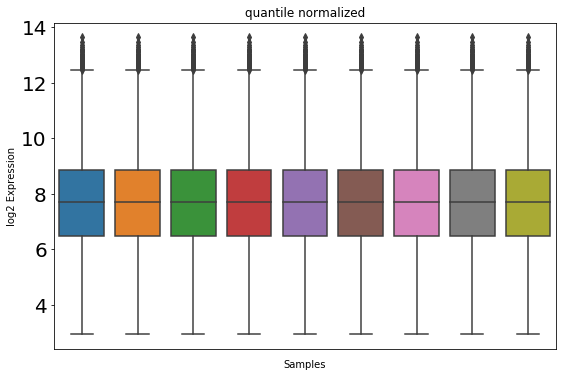

In [23]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:10], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

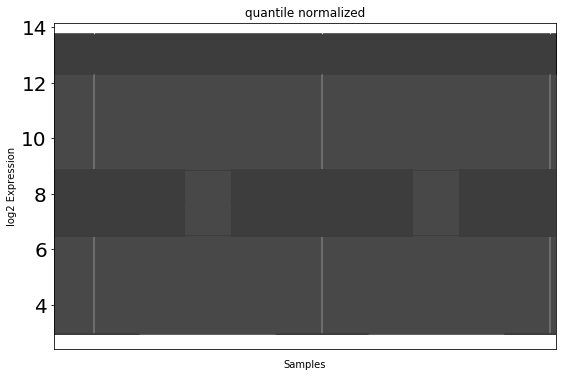

In [25]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 500:1000], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

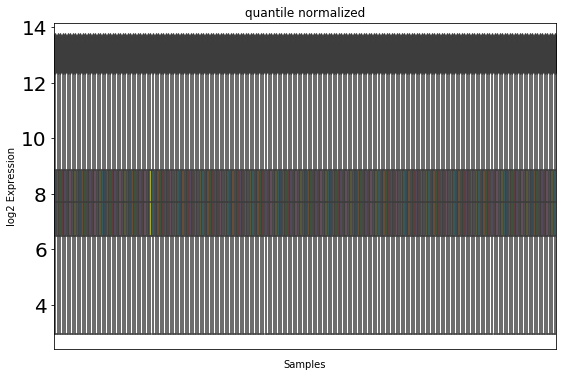

In [26]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 2000:2200], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

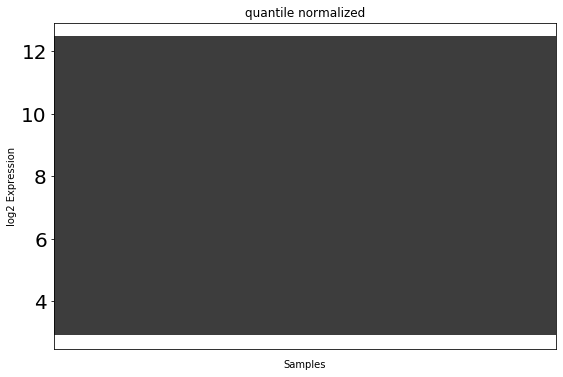

In [27]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:expression.shape[1]], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

# 3. dimensionality reduction

In [28]:
transpose_expression_qn = expression_qn.transpose()
transpose_expression_qn.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.674178,9.253471,4.348688,6.547967,8.226402,7.877847,5.749067,6.206224,10.636120,9.778866,...,10.163430,11.088139,8.392577,10.538061,7.682210,9.836996,5.061649,6.168413,6.018051,6.700115
GSM752710.cel,6.962708,9.450826,4.065701,6.769329,8.032836,7.895058,5.468747,6.288019,10.499423,9.397884,...,10.099152,11.525933,8.771970,10.807247,7.391308,9.823300,4.774275,5.997441,5.814616,6.052927
GSM752711.cel,6.274973,9.358252,4.198858,6.382631,8.411676,7.915058,6.250226,5.814616,10.653945,9.897394,...,10.110796,11.266447,8.381983,10.480788,7.975027,9.895337,4.552457,6.131025,6.048658,6.539920
GSM752712.cel,6.483298,9.347803,4.587900,6.334080,8.095503,8.000321,5.698585,5.916943,10.664650,9.821316,...,10.108416,11.124328,8.410712,10.373180,7.771491,9.835031,5.103788,6.311302,5.820957,6.340377
GSM752713.cel,7.144404,10.134623,4.490600,6.621219,8.016995,7.993288,5.666206,5.893772,10.632673,9.643835,...,10.120252,9.938836,8.628687,10.437714,7.318389,9.726615,4.523678,5.617235,6.151873,6.190025


# 3.1. tSNE

In [30]:
# testing_perplexity = numpy.linspace(5, 50, 25)
# testing_perplexity

In [31]:
# testing_early_exaggeration = numpy.linspace(5, 20, 15)
# testing_early_exaggeration

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 2636 samples in 0.008s...
[t-SNE] Computed neighbors for 2636 samples in 0.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2636
[t-SNE] Computed conditional probabilities for sample 2000 / 2636
[t-SNE] Computed conditional probabilities for sample 2636 / 2636
[t-SNE] Mean sigma: 10.878184
[t-SNE] Computed conditional probabilities in 0.182s
[t-SNE] Iteration 50: error = 66.7349625, gradient norm = 0.1195562 (50 iterations in 0.958s)
[t-SNE] Iteration 100: error = 59.6007385, gradient norm = 0.0480795 (50 iterations in 0.517s)
[t-SNE] Iteration 150: error = 58.4734077, gradient norm = 0.0394708 (50 iterations in 0.519s)
[t-SNE] Iteration 200: error = 58.0397644, gradient norm = 0.0422799 (50 iterations in 0.457s)
[t-SNE] Iteration 250: error = 57.7908936, gradient norm = 0.0384811 (50 iterations in 0.463s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.790894
[t-SNE] Iteration 300: er

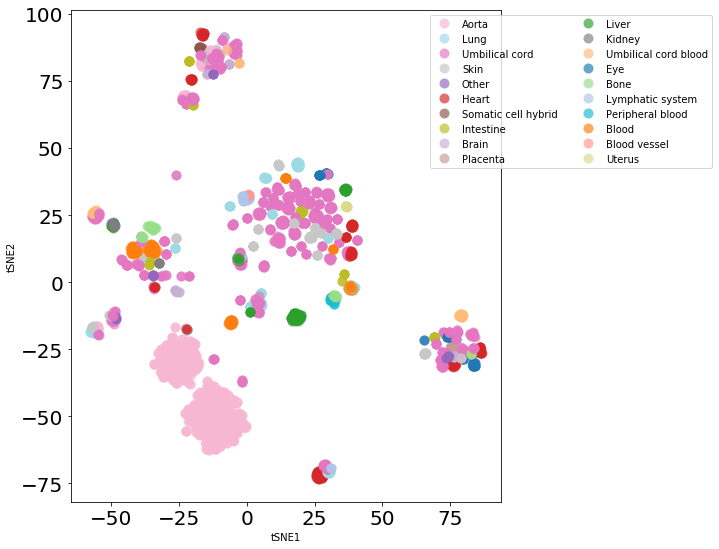

In [32]:
%%time

embedded = sklearn.manifold.TSNE(learning_rate=330,n_iter=3000,perplexity=60, random_state=0, verbose=2).fit_transform(transpose_expression_qn)



In [ ]:
matplotlib.pyplot.figure(figsize=(12, 8))
tagged_tissue = []

for i in range(len(embedded)):
    x = embedded[i, 0]
    y = embedded[i, 1]
    tissue = tissues_of_origin[i]

    if tissue not in tagged_tissue:
        matplotlib.pyplot.plot(x, y, 'o', color=working_colors[i], alpha=2/3, ms=10, mew=0, label=tissue)
        tagged_tissue.append(tissue)
    else:
        matplotlib.pyplot.plot(x, y, 'o', color=working_colors[i], alpha=2/3, ms=10, mew=0)

matplotlib.pyplot.legend(bbox_to_anchor=(1.5, 1), ncol=2)
matplotlib.pyplot.xlabel('tSNE1')
matplotlib.pyplot.ylabel('tSNE2')
matplotlib.pyplot.tight_layout(pad=2)
#matplotlib.pyplot.savefig('figures/tsne.{}.pdf'.format(working_parameter))

In [38]:
n_neighbors=230, min_dist=0.0, metric='correlation'

2636

In [35]:
tsne_features=pandas.DataFrame(embedded ,columns=['P1','P2'])

In [39]:
tsne_features["Organ"]=tissues_of_origin

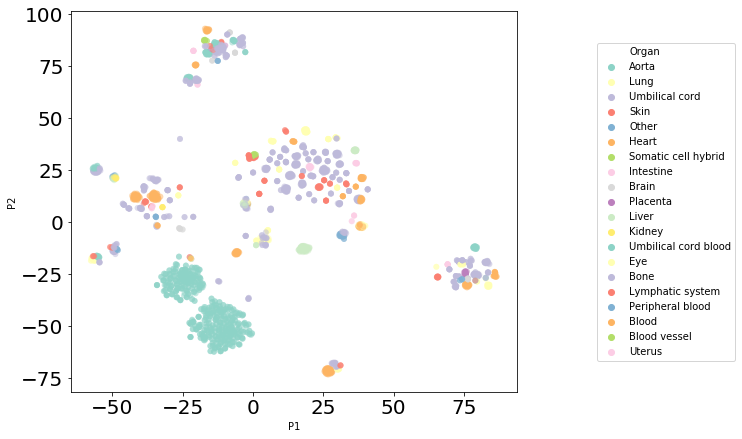

In [41]:
matplotlib.pyplot.figure(figsize=(8, 7))
g=seaborn.scatterplot(x='P1',y='P2',data=tsne_features,hue="Organ", palette="Set3", linewidth=0, alpha=1/2)
g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
matplotlib.pyplot.savefig(f'tesne after quantile.pdf')
matplotlib.pyplot.show()

# 3.2. UMAP

In [42]:
# testing_values = numpy.linspace(25, 300, 25).astype('int')
# testing_values

In [296]:
embedding=[]
for i in range(150,300,30):
    for j in ['cosine','correlation']:
        reducer = umap.UMAP(n_neighbors=i, min_dist=0.0, metric=j)
        embedding1 = reducer.fit_transform(dfq)
        embedding1=pd.DataFrame(embedding1,columns=["Umap_1","Umap_2"])
        embedding1["Organ"]=OrgansCc
        embedding.append(embedding1)
        time.sleep(10)


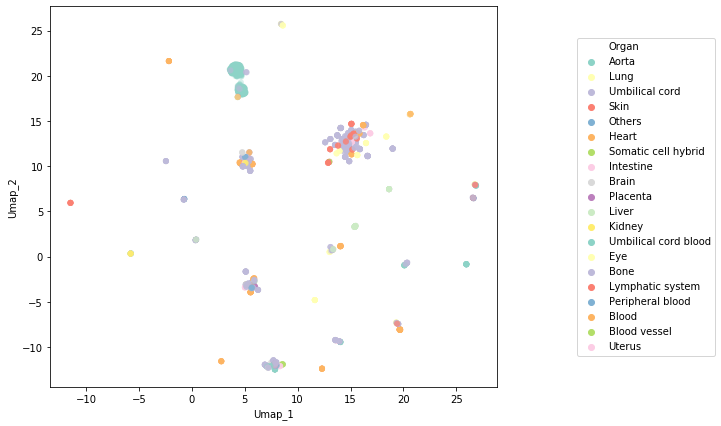

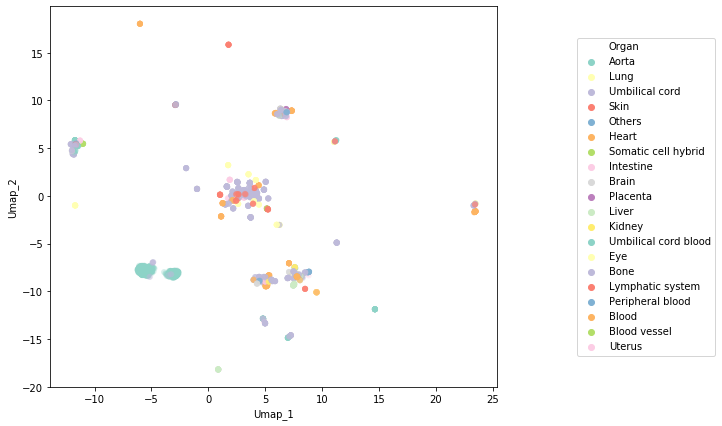

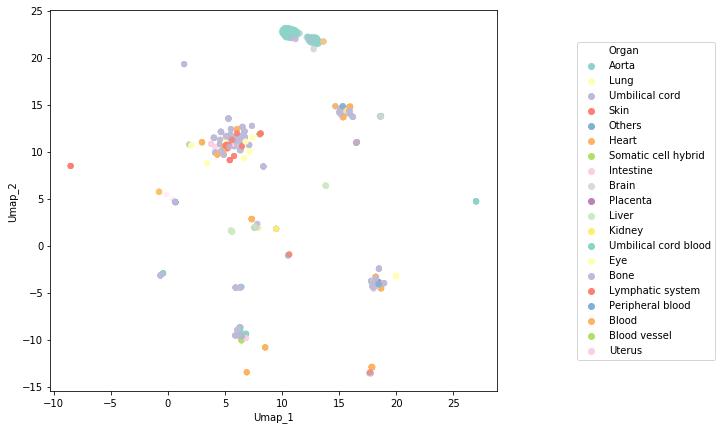

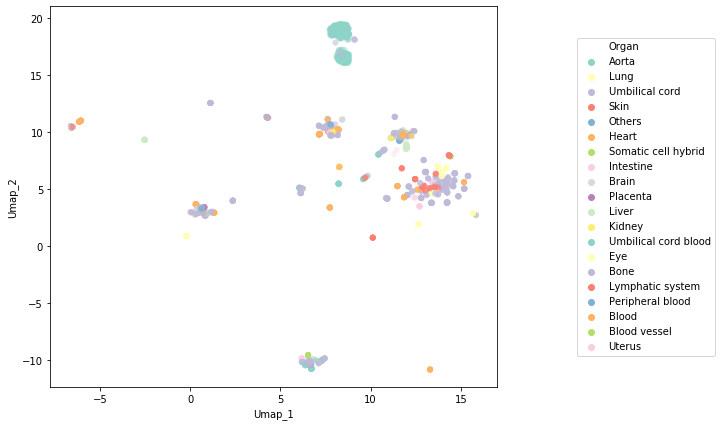

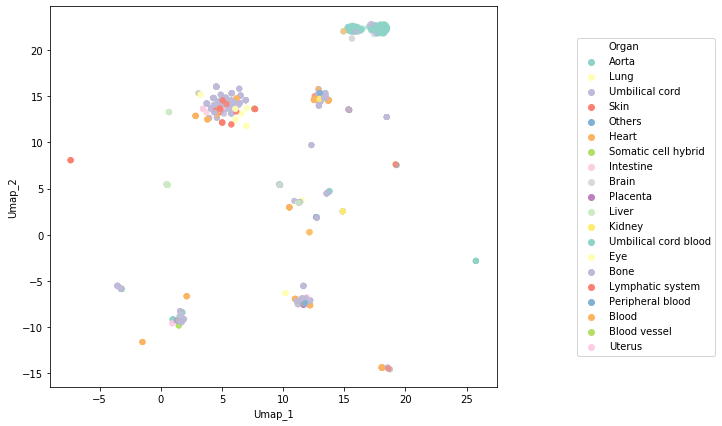

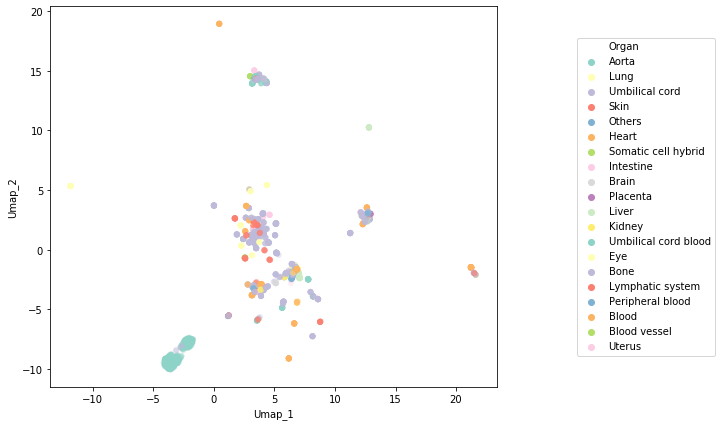

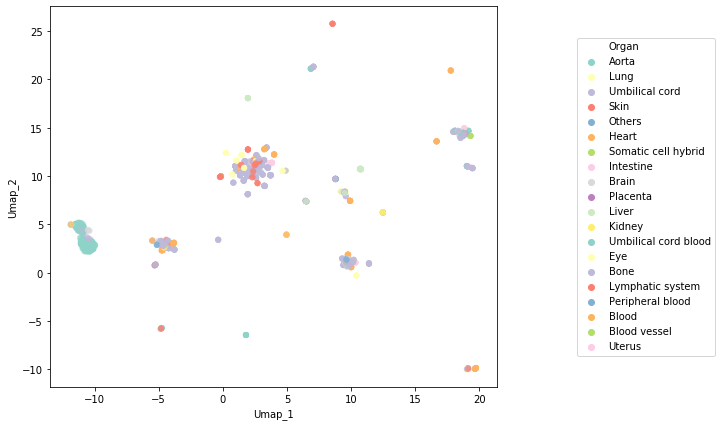

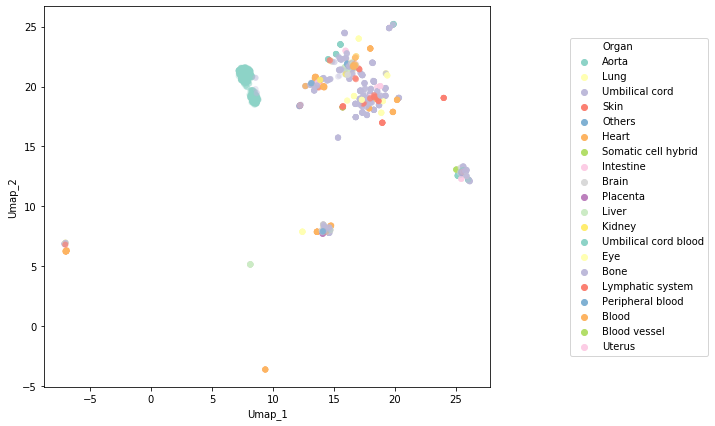

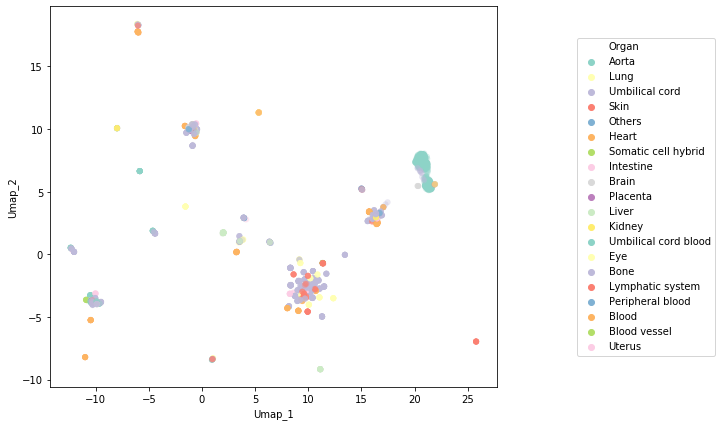

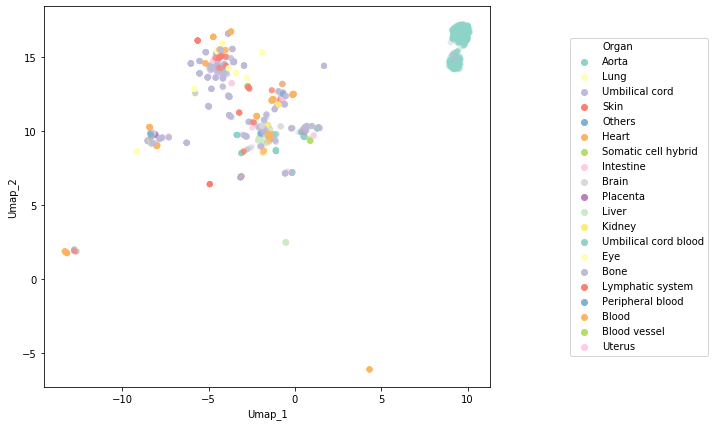

In [299]:
for i in range(0,10):
    plt.figure(figsize=(8, 7))
    g=sns.scatterplot(x="Umap_1", y="Umap_2",data=embedding[i],hue="Organ", palette="Set3", linewidth=0, alpha=1/3)
    g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.savefig(f'Umap{i}.pdf')
    plt.show()

In [43]:
%%time

embedded = umap.UMAP(n_neighbors=230, min_dist=0.0, metric='correlation').fit_transform(transpose_expression_qn)


CPU times: user 1min 11s, sys: 446 ms, total: 1min 11s
Wall time: 59 s


In [44]:
umap_features=pandas.DataFrame(embedded ,columns=['P1','P2'])

In [48]:
umap_features["Organ"]=tissues_of_origin

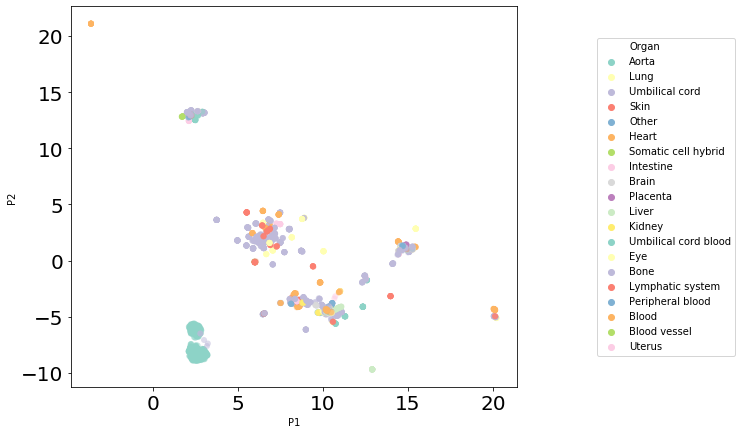

In [49]:
matplotlib.pyplot.figure(figsize=(8, 7))
g=seaborn.scatterplot(x='P1',y='P2',data=umap_features,hue="Organ", palette="Set3", linewidth=0, alpha=1/2)
g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
matplotlib.pyplot.savefig(f'tesne after quantile.pdf')
matplotlib.pyplot.show()

# 3.3 PCA

In [50]:
scaled_data=sklearn.preprocessing.scale(transpose_expression_qn)

In [51]:
pca=PCA(n_components=2)

In [52]:
pca.fit(scaled_data)

PCA(n_components=2)

In [53]:
pca_data=pca.transform(scaled_data)

In [55]:
per_var=numpy.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['Pc'+ str(x) for x in range(1,len(per_var)+1)]

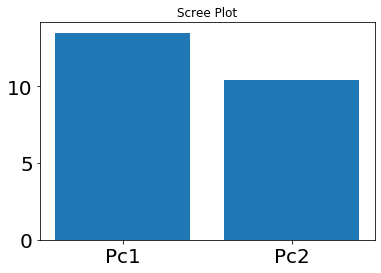

In [56]:
matplotlib.pyplot.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
matplotlib.pyplot.title("Scree Plot")
matplotlib.pyplot.show()

In [58]:
principalDf = pandas.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])

In [60]:
principalDf['Organ']=tissues_of_origin

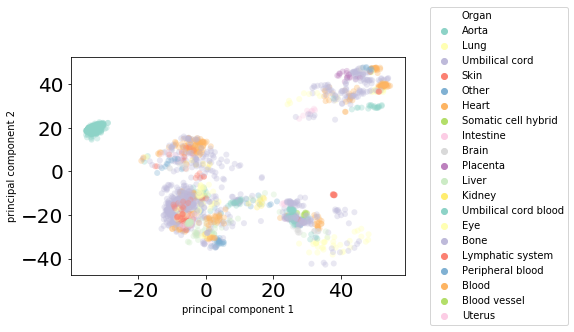

In [61]:
g=seaborn.scatterplot('principal component 1', 'principal component 2',data=principalDf, hue="Organ", palette="Set3",linewidth=0, alpha=1/3)
g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
matplotlib.pyplot.show()

# 4. Coefficient of variation & entropy

In [ ]:
# 4.1 Coefficient of variation

In [24]:
import scipy.stats as sp

In [152]:
CV=dfq.apply(sp.variation)

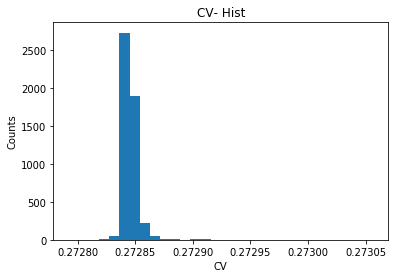

In [153]:
plt.hist(CV,bins=30)
plt.title('CV- Hist')
plt.ylabel('Counts')
plt.xlabel('CV')
plt.savefig('CV-Hist After Quantile.pdf')

In [18]:
CVf=df.apply(sp.variation)

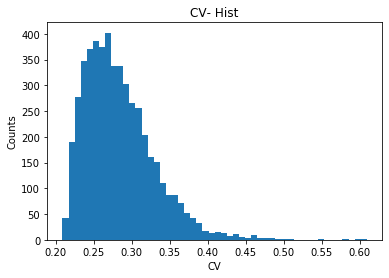

In [19]:
plt.hist(CVf,bins=50)
plt.title('CV- Hist')
plt.ylabel('Counts')
plt.xlabel('CV')
plt.savefig('CV-Hist befor Quantile.pdf')

In [31]:
min(CV)

0.2727923040852987

In [32]:
max(CV)

0.2730563418063979

In [33]:
min(CVf)

0.20887568747775442

In [34]:
max(CVf)

0.609586317737457

Finding the best Umap

In [303]:
embedding=[]
for i in range(150,300,30):
        reducer = umap.UMAP(n_neighbors=i, min_dist=0.0, metric='correlation')
        embedding1 = reducer.fit_transform(dfq)
        embedding1=pd.DataFrame(embedding1,columns=["Umap_1","Umap_2"])
        embedding1["Organ"]=OrgansCc
        embedding.append(embedding1)
        time.sleep(10)

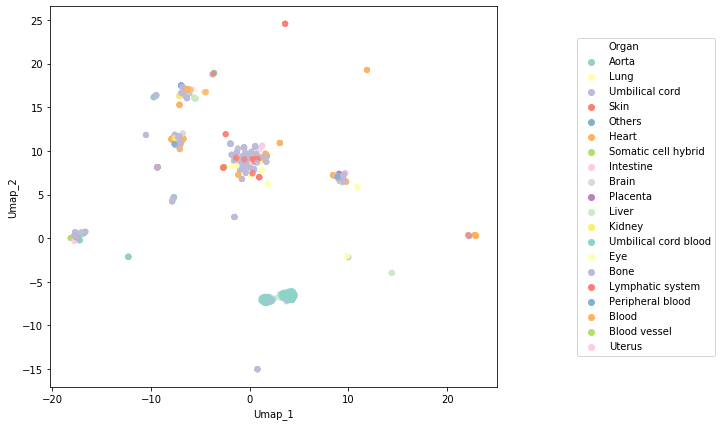

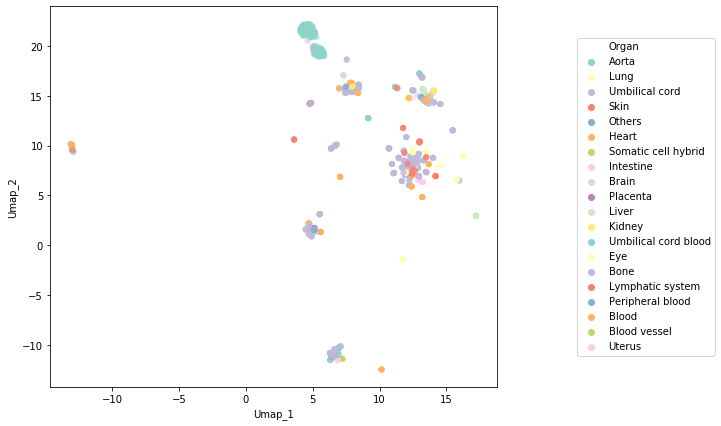

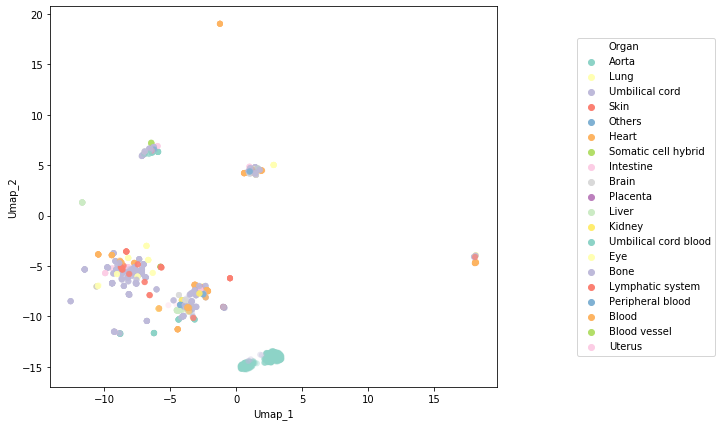

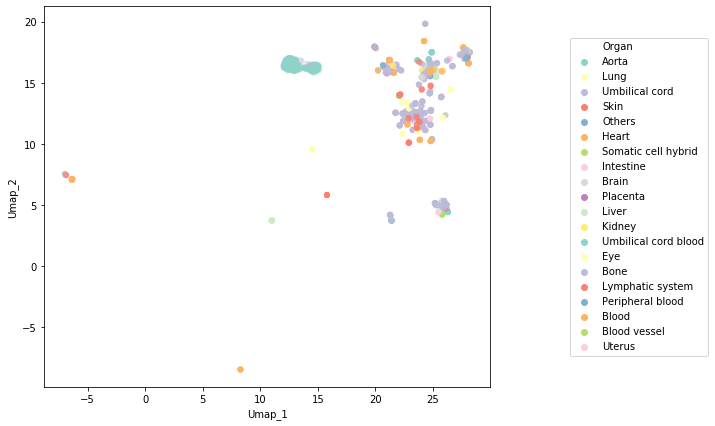

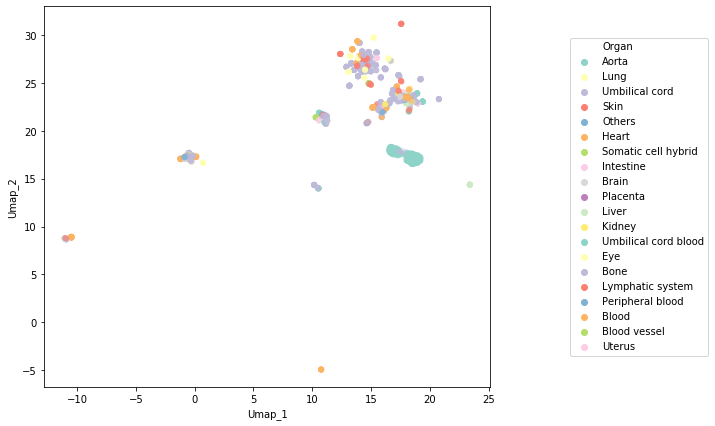

IndexError: list index out of range

<Figure size 576x504 with 0 Axes>

In [305]:
for i in range(0,10):
    plt.figure(figsize=(8, 7))
    g=sns.scatterplot(x="Umap_1", y="Umap_2",data=embedding[i],hue="Organ", palette="Set3", linewidth=0, alpha=1/3)
    g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
    plt.savefig(f'Umapcor{i}.pdf')
    plt.show()

In [310]:
reducer = umap.UMAP(n_neighbors=230, min_dist=0.0, metric='correlation')
embedding = reducer.fit_transform(dfq)
embedding1=pd.DataFrame(embedding,columns=["Umap_1","Umap_2"])
embedding1["Organ"]=OrgansCc

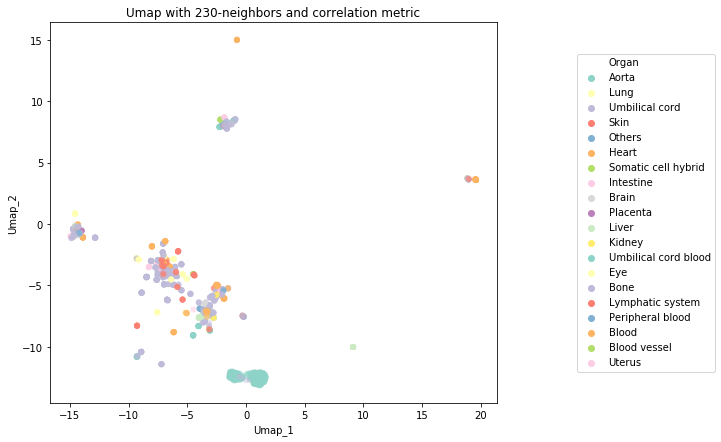

In [312]:
plt.figure(figsize=(8, 7))
g=sns.scatterplot(x="Umap_1", y="Umap_2",data=embedding1,hue="Organ", palette="Set3", linewidth=0, alpha=1/3)
g.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
plt.title("Umap with 230-neighbors and correlation metric")
plt.savefig(f'Umap with 230-neighbors.pdf')
plt.show()

In [ ]:
random.sample(dfq)

In [22]:
j=0
for i in range(0,len(CVf)):
    if list(CVf)[i]>=.35:
        j=j+1

In [23]:
j

425

In [41]:
j=0
n=[]
for i in range(0,len(CV)):
    if list(CV)[i]>=.27285:
        n.append(i)
        j=j+1

In [42]:
j

618

In [56]:
dfq.iloc[:,n]

Feature,10055,10529,10533,10985,11179,2004,22897,23405,23483,23549,...,81545,84272,9130,9141,9352,9392,9497,9538,9871,9933
GSM752709.cel,8.390110,6.790563,7.306696,6.956310,8.213696,6.920622,6.152441,7.214210,7.707538,6.723707,...,7.667089,6.602851,5.840454,8.574223,9.669774,6.738306,7.602484,8.273731,7.808425,7.409664
GSM752710.cel,8.234016,6.902057,7.057519,7.597447,8.164043,6.725546,5.724068,6.803135,7.409664,6.797861,...,7.497450,6.463838,6.117139,8.942743,8.374557,6.366941,6.721887,7.742964,6.856458,7.869368
GSM752711.cel,7.869368,6.905390,7.140405,6.966705,8.411027,6.526210,4.855313,7.265742,7.744664,6.662742,...,7.478812,6.902057,5.799897,8.727775,9.751781,6.604894,7.844018,7.955455,8.164043,7.736235
GSM752712.cel,8.346650,6.691932,7.832170,6.825852,8.291039,6.340875,4.945574,7.210828,7.798289,6.834392,...,7.660277,7.289711,5.955405,8.474268,9.829089,6.827543,7.660277,7.938634,7.854107,7.588944
GSM752713.cel,8.318749,6.569339,7.337184,6.753074,7.837274,7.050508,6.668602,7.116440,7.045231,7.154091,...,7.150648,6.780034,6.366941,8.228962,9.309141,7.311772,6.966705,7.588944,7.288038,7.517944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM46391.CEL,6.397449,9.021047,8.659723,6.627221,8.412751,8.540211,8.007165,7.026061,9.751781,7.406323,...,8.906035,7.571874,5.849116,6.097222,7.821980,6.946242,8.388358,5.590647,5.844809,6.473144
GSM46392.CEL,6.803135,9.315572,8.729639,8.437269,7.246663,9.507977,9.247960,9.500947,8.952447,8.407541,...,9.280686,7.406323,8.854492,6.830930,10.274296,6.721887,8.919517,6.069927,6.045377,6.456813
GSM46393.CEL,6.971883,9.309141,9.302549,8.337924,7.482197,9.282921,9.920123,9.864712,8.559915,8.911754,...,9.050897,7.558414,9.289466,7.050508,10.090757,6.760325,9.421279,5.818063,6.699456,6.382301
GSM46394.CEL,5.528870,10.021261,8.610242,4.855313,8.724064,7.888101,7.849061,8.275483,10.383173,7.721064,...,8.685500,7.338867,5.363526,5.607359,7.575304,7.011864,8.371090,5.132455,5.729080,6.258039


In [25]:
from sklearn.datasets import make_blobs

In [26]:
import hdbscan

In [27]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=300,
).fit_predict(embedding1.drop(['Organ'], axis='columns'))

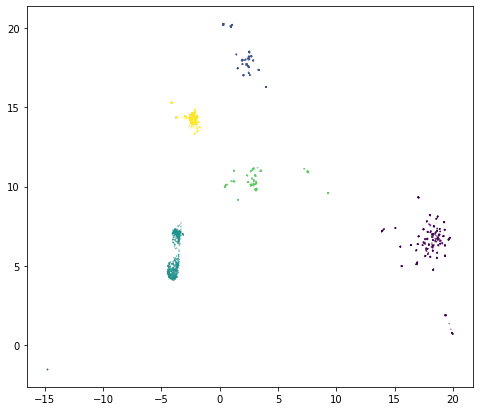

In [28]:
clustered = (labels >= 0)
plt.figure(figsize=(8, 7))
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            s=0.1,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            );

In [29]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [30]:
np.sum(clustered) / dfq.shape[0]

0.9954476479514416

In [31]:
from sklearn.cluster import KMeans

In [32]:
import sklearn.cluster as cluster

In [33]:
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(dfq)

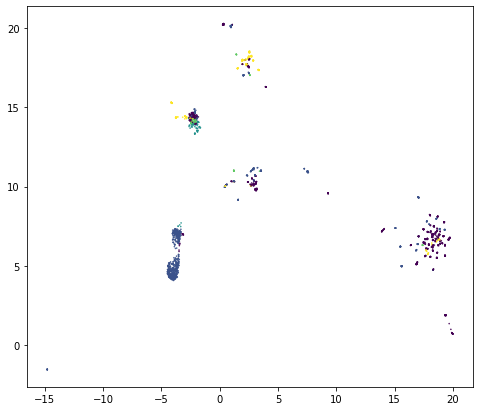

In [34]:
plt.figure(figsize=(8, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=0.3)

In [35]:
lowd_mnist = PCA(n_components=50).fit_transform(dfq)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=500).fit_predict(lowd_mnist)

NameError: name 'PCA' is not defined

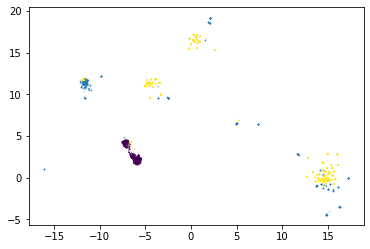

In [50]:
clustered = (hdbscan_labels >= 0)
plt.figure(figsize=(8, 7))
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            s=0.1,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1);

In [51]:
np.sum(clustered) /dfq.shape[0]

0.6418816388467374

# Entropy 

In [96]:
from scipy.stats import entropy
# Bernoulli trial with different p.

In [104]:
transpose_expression_qn.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.674178,9.253471,4.348688,6.547967,8.226402,7.877847,5.749067,6.206224,10.636120,9.778866,...,10.163430,11.088139,8.392577,10.538061,7.682210,9.836996,5.061649,6.168413,6.018051,6.700115
GSM752710.cel,6.962708,9.450826,4.065701,6.769329,8.032836,7.895058,5.468747,6.288019,10.499423,9.397884,...,10.099152,11.525933,8.771970,10.807247,7.391308,9.823300,4.774275,5.997441,5.814616,6.052927
GSM752711.cel,6.274973,9.358252,4.198858,6.382631,8.411676,7.915058,6.250226,5.814616,10.653945,9.897394,...,10.110796,11.266447,8.381983,10.480788,7.975027,9.895337,4.552457,6.131025,6.048658,6.539920
GSM752712.cel,6.483298,9.347803,4.587900,6.334080,8.095503,8.000321,5.698585,5.916943,10.664650,9.821316,...,10.108416,11.124328,8.410712,10.373180,7.771491,9.835031,5.103788,6.311302,5.820957,6.340377
GSM752713.cel,7.144404,10.134623,4.490600,6.621219,8.016995,7.993288,5.666206,5.893772,10.632673,9.643835,...,10.120252,9.938836,8.628687,10.437714,7.318389,9.726615,4.523678,5.617235,6.151873,6.190025


In [99]:
def Entropy(L):
    return entropy(L,base=2)

In [101]:
expression_entropy= pandas.DataFrame(transpose_expression_qn.apply(Entropy).to_dict(), index=['Entropy'])

In [102]:
expression_entropy

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
Entropy,11.351164,11.33739,11.311933,11.34301,11.337128,11.350662,11.322726,11.335313,11.345064,11.355292,...,11.355431,11.31731,11.358056,11.35017,11.357049,11.357537,11.328724,11.326913,11.346957,11.335409


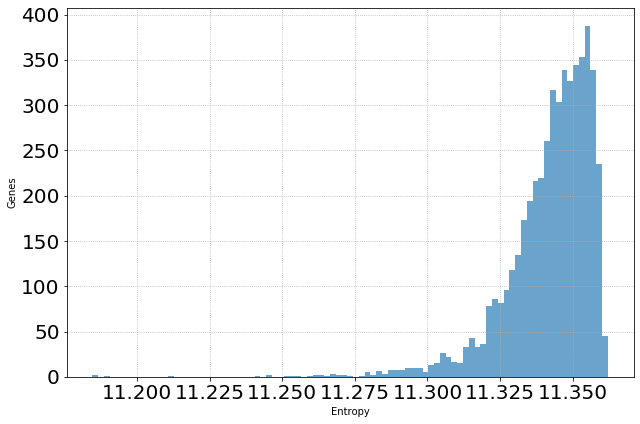

In [103]:
matplotlib.pyplot.figure(figsize=(9, 6))
tempo = matplotlib.pyplot.hist(expression_entropy, bins='auto', density=False, alpha=2/3)
matplotlib.pyplot.xlabel('Entropy')
matplotlib.pyplot.ylabel('Genes')
matplotlib.pyplot.grid(0.5, ls=':')
matplotlib.pyplot.tight_layout()

In [115]:
min(expression_entropy.iloc[:,1])

11.337389766050569